# Customer Drop-Off Funnel Analysis
This notebook analyzes where customers drop off in the loan application funnel using simulated DSA data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('customer_dropoff_funnel.csv')
df.head()

,customer_id,lead_source,call_status,verification_status,document_upload,bank_forwarded,loan_approved,timestamp
0,C0001,Referral,Not Picked,NaN,NaN,No,No,2025-06-02 01:59:00
1,C0002,Website,Connected,Verified,Uploaded,Yes,No,2025-06-21 19:39:00
2,C0003,Google Ads,Not Picked,NaN,NaN,No,No,2025-06-05 10:42:00
3,C0004,WhatsApp,Not Picked,NaN,NaN,No,No,2025-06-09 18:51:00
4,C0005,Google Ads,Connected,Verified,Not Uploaded,No,No,2025-06-04 20:24:00


## Funnel Metrics Calculation

In [3]:
# Total Leads
total_leads = df.shape[0]

# Funnel counts
connected = df[df['call_status'] == 'Connected'].shape[0]
verified = df[df['verification_status'] == 'Verified'].shape[0]
documents_uploaded = df[df['document_upload'] == 'Uploaded'].shape[0]
forwarded = df[df['bank_forwarded'] == 'Yes'].shape[0]
approved = df[df['loan_approved'] == 'Yes'].shape[0]

# Funnel DataFrame
funnel = pd.DataFrame({
    'Stage': ['Total Leads', 'Connected', 'Verified', 'Documents Uploaded', 'Bank Forwarded', 'Loan Approved'],
    'Count': [total_leads, connected, verified, documents_uploaded, forwarded, approved]
})

# Drop-off from previous step
funnel['Drop-off from previous (%)'] = funnel['Count'].pct_change().apply(lambda x: round((1 - x) * 100, 2)).fillna(0)
funnel

,Stage,Count,Drop-off from previous (%)
0,Total Leads,1000,0.00
1,Connected,797,120.30
2,Verified,600,124.72
3,Documents Uploaded,409,131.83
4,Bank Forwarded,346,115.40
5,Loan Approved,210,139.31


## Funnel Visualization

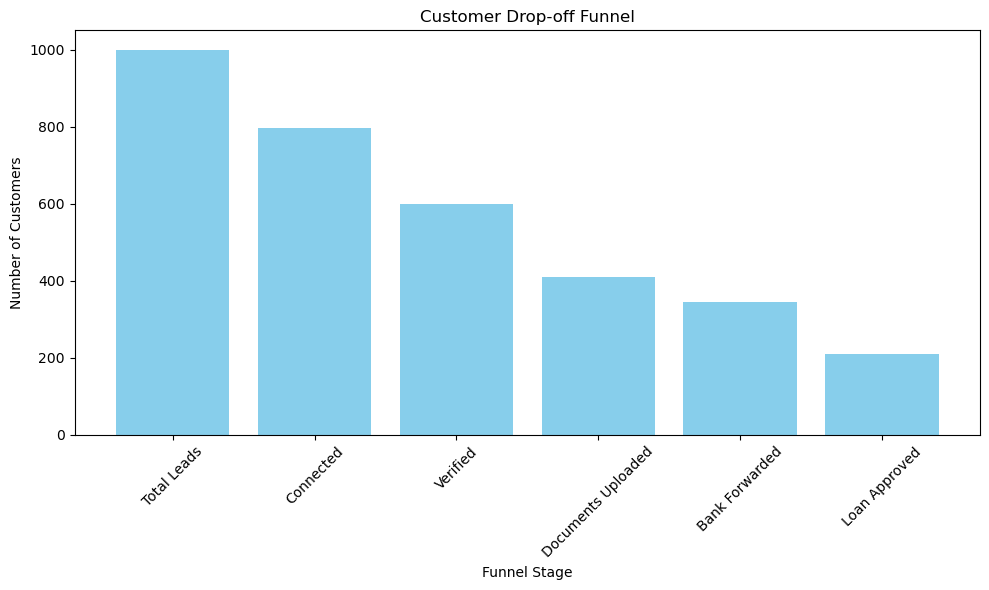

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(funnel['Stage'], funnel['Count'], color='skyblue')
plt.title('Customer Drop-off Funnel')
plt.xlabel('Funnel Stage')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
lead_drop = df[df['call_status'] == 'Connected'].groupby('lead_source').size()
verified_drop = df[df['verification_status'] == 'Verified'].groupby('lead_source').size()

conversion_by_source = pd.DataFrame({
    'Connected': lead_drop,
    'Verified': verified_drop
}).fillna(0)

conversion_by_source['Verification Rate (%)'] = (conversion_by_source['Verified'] / conversion_by_source['Connected']) * 100
conversion_by_source


,Connected,Verified,Verification Rate (%)
lead_source,,,
Facebook,151,111,73.509934
Google Ads,175,130,74.285714
Referral,173,133,76.878613
Website,167,126,75.449102
WhatsApp,131,100,76.335878
